# 

In [1]:
# Using Calendar
import numpy as np
import pandas as pd
import os
cwd = os.getcwd()

import matplotlib.pyplot as plt
import seaborn as sns

# Plots the figures in same place instead of a new window
%matplotlib inline

In [2]:
# Create DFs for holding 'calendar.csv' data
calendarData = pd.read_csv(cwd+"//"+"Data//Boston//calendar.csv")
calendarData.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [3]:
availableApts = calendarData[['date', 'available']]

#convert available column to 1 if available and 0 if not to do farther grouping operation
available = availableApts.apply(lambda row : 1 if row['available'] == 't' else 0, 1)
availableApts.loc[:,'available'] = available

C:\Users\Ankeeta\Anaconda3\lib\site-packages\pandas\core\indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [7]:
groupedData   = availableApts.groupby([availableApts.date]).agg(['sum', 'count'])
groupedData.loc[:, 'avg'] = groupedData['available']['sum']/groupedData['available']['count']

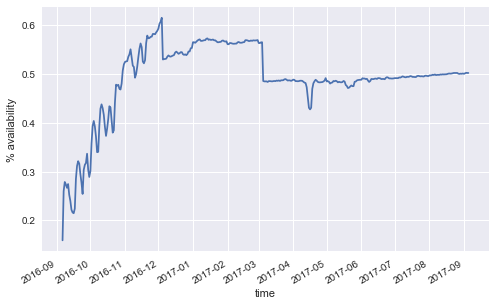

In [10]:
#plotting the availability over days

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, WeekdayLocator, DayLocator
from datetime import datetime
import matplotlib
years = YearLocator()   # every year
months = MonthLocator()  # every month
days = DayLocator()  # every day
yearsFmt = DateFormatter('Y%')
monthsFmt = DateFormatter('%Y-%m')

dates = pd.to_datetime(groupedData.index.values, errors='ignore')
dates = dates.astype(datetime)
dates = matplotlib.dates.date2num(dates)

fig, axs = plt.subplots(1,1)
axs.plot_date(dates, groupedData.avg.tolist(), '-')

axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(monthsFmt)
axs.xaxis.set_minor_locator(days)
axs.autoscale_view()
axs.fmt_xdata = DateFormatter('%Y-%m-%d')
axs.grid(True)
axs.set_xlabel('time')
axs.set_ylabel('% availability')

fig.adjustable = True
fig.set_size_inches(8, 5) 
fig.autofmt_xdate()
plt.show()

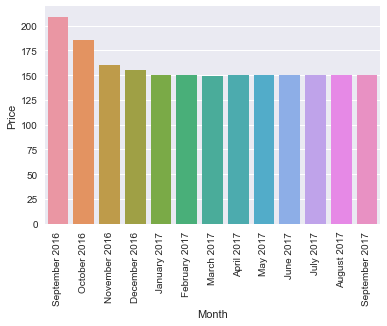

In [11]:
#Price variations across the year

# Dropping calendar data having NaN values, converting price to float to get rid of','
calendarData= calendarData.dropna()
if calendarData.price.dtype != np.float64:
    calendarData.price = calendarData.price.map(lambda p : float(p[1:-3].replace(',','')))
calendarData['date'] = pd.to_datetime(calendarData['date'])

# Grouping price based on on month of the year using TimeGrouper and taking Average
price=calendarData.set_index('date').groupby(pd.TimeGrouper(freq='M')).median()

# Plotting bar graph to show price of listings based on time of the year
# strftime converts date back to string type for displaying; %B- month abbreviation, %Y- Year
sns.barplot(x=price.index.strftime('%B %Y'),y=price['price'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Price')